# Is the cinema sexist? 

**Authors**
- Arthur Tabary 
- Maxime Leriche
- Madeleine Robert
- Marjorie Cayatte

**Date**\
November, 18th, 2022

In this Notebook, we present our initial analyses and results. We first import the necessay libraries. 

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
import math
from scipy import stats
import json
from datetime import datetime, date, time

## Import the different datasets

We import the following datasets from the **CMU Movie Summary Corpus** as DataFrame: 
- *movie.metadata.tsv.gz*: metadata for 81,741 movies, extracted from the November 4, 2012 dump of Freebase. 
- *character.metadata.tsv.gz*: metadata for 450,669 characters aligned to the movies, extracted from the November 4, 2012 dump of Freebase. 

In [37]:
#Import movie metadata
movies = pd.read_csv('Data/MovieSummaries/movie.metadata.tsv',sep='\t',header=None)
movies.columns=['wiki_movie_ID','freebase_movie_ID','movie_name','movie_release_date','movie_box_off_rev','movie_runtime','movie_languages','movie_countries','movie_genres']
movies.head()

,wiki_movie_ID,freebase_movie_ID,movie_name,movie_release_date,movie_box_off_rev,movie_runtime,movie_languages,movie_countries,movie_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [38]:
#Load character metadata
characters = pd.read_csv('Data/MovieSummaries/character.metadata.tsv',sep='\t',header=None)
characters.columns = ['wiki_movie_ID','freebase_movie_ID','movie_release_date','character_name','actor_DOB','actor_gender','actor_height','actor_ethnicity','actor_name','actor_age_movie','freebase_char/actor_map_ID','freebase_char_ID','freebase_actor_ID']
characters.head()

,wiki_movie_ID,freebase_movie_ID,movie_release_date,character_name,actor_DOB,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age_movie,freebase_char/actor_map_ID,freebase_char_ID,freebase_actor_ID
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


## Arthur's part - tu veux mettre quoi comme titre ?

### Transform the dataset

In [39]:
movies.sort_values(by='movie_release_date', ascending=False).head()

,wiki_movie_ID,freebase_movie_ID,movie_name,movie_release_date,movie_box_off_rev,movie_runtime,movie_languages,movie_countries,movie_genres
34022,23124260,/m/064mmw7,Jeepers Creepers 4,2016-06-08,NaN,NaN,{},"{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/03npn"": ""Horror""}"
30275,27554912,/m/0c03gcc,Kung Fu Panda 3,2016-03-18,NaN,NaN,{},{},{}
64862,3139382,/m/08tyfg,Battle Angel,2016,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
53855,32416903,/m/0gys9tc,Total Dhamaal,2015,NaN,138.0,"{""/m/03k50"": ""Hindi Language""}",{},"{""/m/05p553"": ""Comedy film""}"
8307,24179103,/m/0jwx0kc,"I, Robot 2",2015,NaN,NaN,{},{},"{""/m/06n90"": ""Science Fiction""}"


We will first transform the dictionnary in list to be easier to manipulate for later analysis

In [40]:
# Split the different genre in each dictionnary of each row into several columns
movies_copy = movies
movies_copy['movie_genres'] = movies['movie_genres'].map(eval).apply(lambda x: list(x.values()))
movies_copy.head()

,wiki_movie_ID,freebase_movie_ID,movie_name,movie_release_date,movie_box_off_rev,movie_runtime,movie_languages,movie_countries,movie_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Thriller, Science Fiction, Horror, Adventure,..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Mystery, Biographical film, Drama, Crime Drama]"
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","[Crime Fiction, Drama]"
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","[Thriller, Erotic thriller, Psychological thri..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}",[Drama]


### How many genre a movie has? 

Here we will add a count of genre by row to see how many genres each movies has.

In [41]:
movies_copy['nb_genres'] = movies_copy['movie_genres'].str.len()
movies_copy.head()

,wiki_movie_ID,freebase_movie_ID,movie_name,movie_release_date,movie_box_off_rev,movie_runtime,movie_languages,movie_countries,movie_genres,nb_genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Thriller, Science Fiction, Horror, Adventure,...",7
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Mystery, Biographical film, Drama, Crime Drama]",4
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","[Crime Fiction, Drama]",2
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","[Thriller, Erotic thriller, Psychological thri...",3
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}",[Drama],1


In [42]:
movies_copy['nb_genres'].describe()

count    81741.000000
mean         2.976829
std          2.107219
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         17.000000
Name: nb_genres, dtype: float64

<AxesSubplot:>

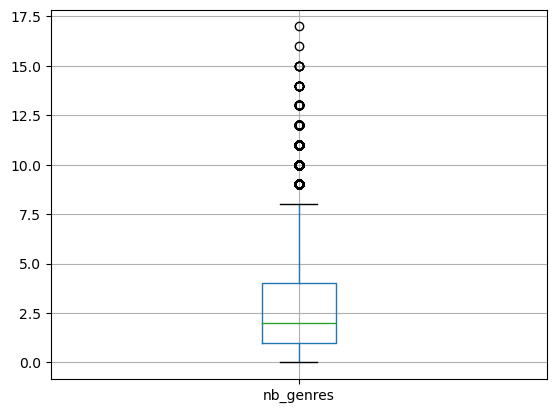

In [43]:
movies_copy.boxplot(['nb_genres'])

With the boxplots and the statistics of the new column "nb_genres", we notice that there are sometimes 17 genres for one movie which seems not necessary. But most of the movies (75%) have between 1 and 4 genres which is more reasonable. For further analysis on genre impact we could think of eliminating outliers. 

### How many movies are reported for each genre? 

We now look at the opposite point of view: we count how many movies are reported for each genre. 

In [44]:
total_genres = pd.DataFrame(movies_copy.movie_genres.explode().dropna().value_counts())
total_genres

,movie_genres
Drama,34007
Comedy,16349
Romance Film,10234
Black-and-white,9094
Action,8798
...,...
Romantic thriller,1
Comdedy,1
C-Movie,1
Silhouette animation,1


We plot how many movies each genre has. 

<AxesSubplot:>

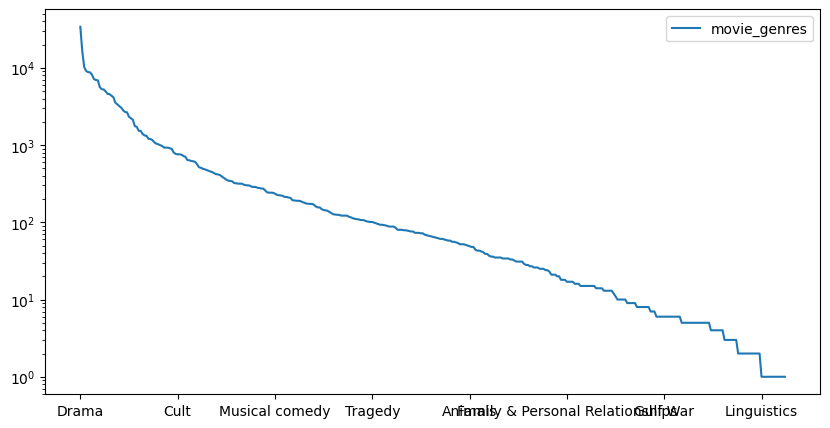

In [45]:
total_genres.plot(logy = True, figsize= (10,5))

<AxesSubplot:xlabel='Genres'>

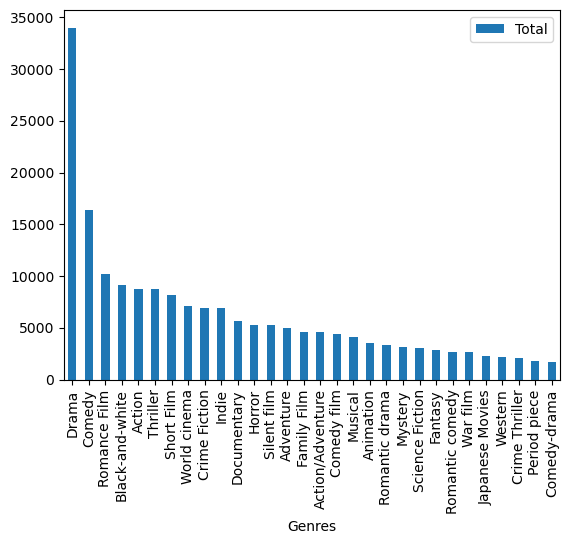

In [46]:
total_genres.index.name = "Genres"
total_genres = total_genres.rename(columns = {'movie_genres': 'Total'})
total_genres.head(30).plot.bar(y = 'Total')

Here we see that the number of films by genre decreases almost exponentially. This is due to cross genre movies "Romantic Thriller" or typo like "Comdedy". There are also a lot of "Genres" which are not strict genres like "silent movie" or "black and white".

### Cleaning the dataset

We notice some corrupted values and correct them. 

In [47]:
# Warning, some rows of the dataset have wrong release dates: here 1010 instead of 2010
movies_copy.iloc[62836]

wiki_movie_ID                                                  29666067
freebase_movie_ID                                            /m/0fphzrf
movie_name                                               Hunting Season
movie_release_date                                           1010-12-02
movie_box_off_rev                                            12160978.0
movie_runtime                                                     140.0
movie_languages       {"/m/02hwyss": "Turkish Language", "/m/02h40lc...
movie_countries                                 {"/m/01znc_": "Turkey"}
movie_genres                  [Crime Fiction, Mystery, Drama, Thriller]
nb_genres                                                             4
Name: 62836, dtype: object

In [48]:
movies_copy.loc[62836, 'movie_release_date'] = '2010-12-02'
#movies_copy['movie_release_date'] = pd.to_datetime(movies_copy['movie_release_date'])
movies_per_year = movies_copy
movies_per_year['movie_release_date'] = movies_per_year['movie_release_date'].str[:4]
movies_per_year.sort_values(by = 'movie_release_date', ascending = False).head()

,wiki_movie_ID,freebase_movie_ID,movie_name,movie_release_date,movie_box_off_rev,movie_runtime,movie_languages,movie_countries,movie_genres,nb_genres
64862,3139382,/m/08tyfg,Battle Angel,2016,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Thriller, Science Fiction, Action, Romance Film]",4
34022,23124260,/m/064mmw7,Jeepers Creepers 4,2016,NaN,NaN,{},"{""/m/09c7w0"": ""United States of America""}","[Thriller, Horror]",2
30275,27554912,/m/0c03gcc,Kung Fu Panda 3,2016,NaN,NaN,{},{},[],0
51429,25813358,/m/0gmbk1g,Avatar 2,2015,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","[Science Fiction, Action, Fantasy, Adventure]",4
8307,24179103,/m/0jwx0kc,"I, Robot 2",2015,NaN,NaN,{},{},[Science Fiction],1


### Temporal evolution

We now look at evolution of the number of movies per genre over time. 

In [49]:
#Compute the number of movies per year and per genre
total_genres_per_year = total_genres
movies_per_year_grouped = movies_per_year.groupby(movies_per_year['movie_release_date'])
years = ['Total']
for year, group in movies_per_year_grouped[['movie_release_date', 'movie_genres']]:
    total_genres_per_year =pd.concat([total_genres_per_year,group.movie_genres.explode().dropna().value_counts()], axis = 1)
    years.append(year)
total_genres_per_year.columns = years
total_genres_per_year.index.name = 'Genres'
total_genres_per_year.head(30)

,Total,1888,1889,1890,1891,1892,1893,1894,1895,1896,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Genres,,,,,,,,,,,,,,,,,,,,,
Drama,34007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,1013.0,985.0,966.0,902.0,842.0,427.0,45.0,4.0,NaN,NaN
Comedy,16349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,...,496.0,512.0,444.0,393.0,267.0,98.0,10.0,1.0,NaN,NaN
Romance Film,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,332.0,349.0,320.0,283.0,261.0,172.0,13.0,3.0,NaN,1.0
Black-and-white,9094,1.0,1.0,NaN,NaN,NaN,1.0,7.0,11.0,19.0,...,3.0,2.0,3.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN
Action,8798,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,239.0,286.0,269.0,287.0,294.0,187.0,44.0,1.0,2.0,1.0
Thriller,8744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,382.0,375.0,397.0,340.0,281.0,172.0,41.0,1.0,NaN,2.0
Short Film,8141,1.0,1.0,1.0,3.0,3.0,1.0,9.0,18.0,43.0,...,149.0,146.0,147.0,137.0,94.0,38.0,1.0,NaN,NaN,NaN
World cinema,7155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,369.0,398.0,393.0,275.0,44.0,4.0,NaN,NaN,NaN,NaN
Crime Fiction,6948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,183.0,175.0,195.0,156.0,135.0,60.0,17.0,NaN,1.0,NaN


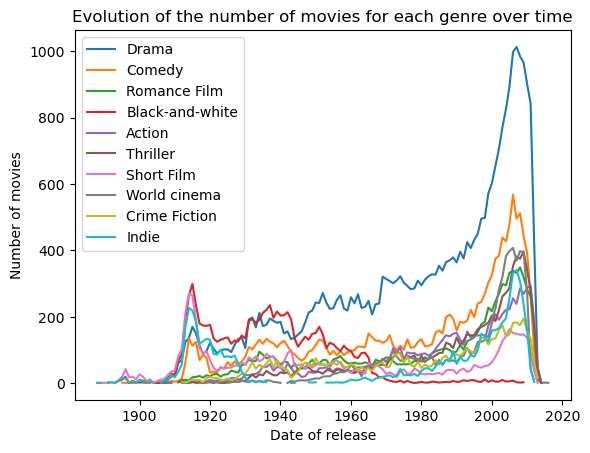

In [50]:
x = np.array(total_genres_per_year.columns[1:], dtype = 'datetime64[ms]')
plt.figure()
for index, row in total_genres_per_year.head(10).iterrows():
    plt.plot(x, row[1:], label = index)
plt.legend()
plt.xlabel("Date of release")
plt.ylabel("Number of movies")
plt.title("Evolution of the number of movies for each genre over time")
plt.show()

By looking at the number of genre per year, we see a similar evolution for every genre. For every genre the number of movies highly increases,  except for "black and white" movies. The striking drop around 2010 probably corresponds to time of extraction of the database (2012).

<AxesSubplot:xlabel='movie_release_date'>

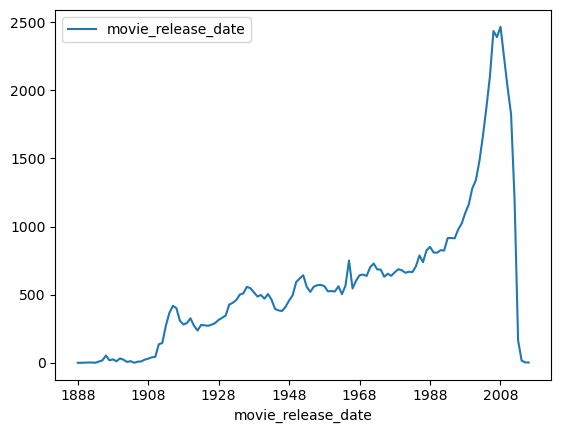

In [53]:
#Aggregated temporal evolution
movies_per_year_grouped[['movie_release_date']].count().plot()

We can look at the counts. 

In [55]:
movies_per_year_grouped[['movie_release_date']].size().reset_index(name='counts').sort_values(by = 'movie_release_date', ascending= False).head(20)

,movie_release_date,counts
128,2016,3
127,2015,4
126,2014,17
125,2013,164
124,2012,1194
123,2011,1824
122,2010,2023
121,2009,2247
120,2008,2465
119,2007,2389


As we can see here, values are incoherent after 2013. Therefore, we will cut off after 2012 (included) because of the time of database extraction. 

According to the following graph made with IMDB dataset, the behavior of the number of movie by year is similar.
![films-released-yearly](films-released-all-time-yearly.png)

## Differences in age and height between male and female characters

> We want to compare different features between roles played by male or female. 

### Evaluating and filtering out missing values

In [36]:
#Create a DataFrame keeping only characters where actors have reported gender
characters_gender = characters[characters["actor_gender"].notnull()]
print('{: .1%} of the DataFrame "characters" has reported gender, the corresponding DataFrame "characters_gender" contains {} rows.'.format(len(characters_gender) / len(characters), len(characters_gender)))

 89.9% of the DataFrame "characters" has reported gender, the corresponding DataFrame "characters_gender" contains 405060 rows.


In [37]:
#What are the possible different values for characters_gender? 
pd.Categorical(characters_gender.actor_gender)

['F', 'F', 'M', 'M', 'F', ..., 'F', 'M', 'F', 'M', 'M']
Length: 405060
Categories (2, object): ['F', 'M']

### What is the repartition between male and female characters? 

66.72% of reported characters are played by male actors.


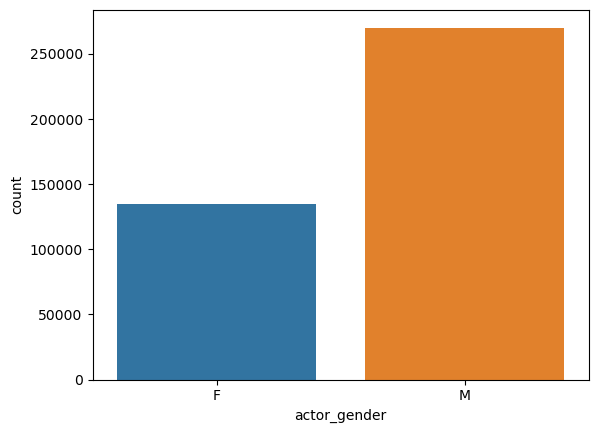

In [38]:
#Create two DataFrame for characters played by female/male
characters_female = characters_gender[characters_gender['actor_gender']== 'F']
characters_male = characters_gender[characters_gender['actor_gender']== 'M']

#Plot the repartition
sns.countplot(x = characters_gender['actor_gender'])

print("{:.2%} of reported characters are played by male actors.".format(len(characters_male)/len(characters_gender)))

### How is age of male characters compared to age of male characters? 

> We want to compare **age** of the actors and actresses palying roles reported in *character*. 

In [39]:
#Clear out characters_gender where age is not reported (characters_gender_age)
characters_gender_age = characters_gender[characters_gender["actor_age_movie"].notnull()]
print('{: .1%} of the DataFrame "characters" has reported gender and age of the actor/actress; the corresponding DataFrame "characters_gender_age" contains {} rows.'.format(len(characters_gender_age) / len(characters), len(characters_gender_age)))

 64.5% of the DataFrame "characters" has reported gender and age of the actor/actress; the corresponding DataFrame "characters_gender_age" contains 290770 rows.


> We first explore and clean the data. 

In [40]:
characters_gender_age.describe()

,wiki_movie_ID,actor_height,actor_age_movie
count,2.907700e+05,139639.000000,290770.000000
mean,1.302929e+07,1.789524,37.804148
std,1.080402e+07,4.380801,20.616015
min,3.300000e+02,0.610000,-7896.000000
25%,3.052538e+06,1.680000,28.000000
50%,1.014264e+07,1.750000,36.000000
75%,2.261175e+07,1.830000,47.000000
max,3.750192e+07,510.000000,103.000000


> The negative values do not make sense: we filter them out.

In [41]:
characters_gender_age = characters_gender_age[characters_gender_age['actor_age_movie'] >= 0]

Text(0, 0.5, 'Age')

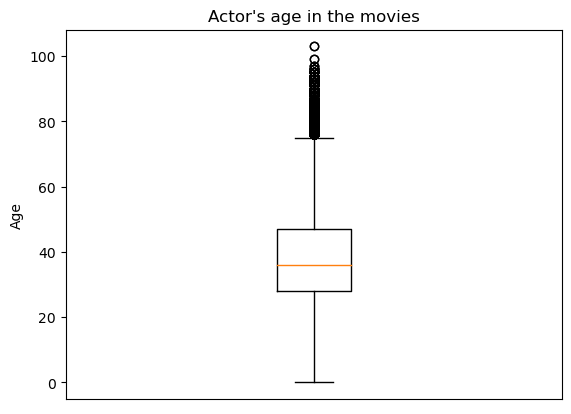

In [42]:
plt.boxplot(characters_gender_age['actor_age_movie'])
plt.xticks([])
plt.title("Actor's age in the movies")
plt.ylabel("Age")

> We can visualize age of actors by gender. 

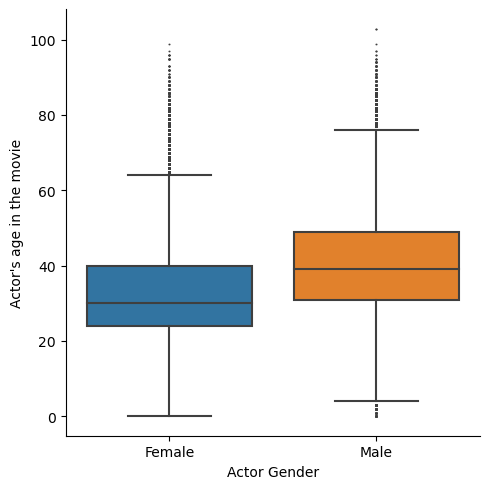

In [43]:
g = sns.catplot(data=characters_gender_age, x="actor_gender", y="actor_age_movie", kind="box", fliersize=0.5)
g.set_axis_labels("Actor Gender", "Actor's age in the movie")
g.set_xticklabels(["Female", "Male"])

### How about height? 

> We can perform the same analysis for height. 

In [16]:
# Clear out characters_gender where height is not reported (characters_gender_age)
characters_gender_height = characters_gender[characters_gender["actor_height"].notnull()]
print('{: .1%} of the DataFrame "characters" has reported gender and height of the actor/actress; the corresponding DataFrame "characters_gender_height" contains {} rows.'.format(len(characters_gender_height) / len(characters), len(characters_gender_height)))

 34.3% of the DataFrame "characters" has reported gender and height of the actor/actress; the corresponding DataFrame "characters_gender_height" contains 154663 rows.


In [17]:
characters_gender_height.describe()

,wiki_movie_ID,actor_height,actor_age_movie
count,1.546630e+05,154663.000000,139639.000000
mean,1.212276e+07,1.788966,37.301671
std,1.076543e+07,4.382216,13.890925
min,3.217000e+03,0.610000,-57.000000
25%,2.511602e+06,1.676400,27.000000
50%,8.627638e+06,1.750000,35.000000
75%,2.107084e+07,1.830000,46.000000
max,3.750192e+07,510.000000,96.000000


> 510 cm seems to be a corrupted value. We filter rows where height is above 2,72m (biggest height reported).

In [18]:
characters_gender_height = characters_gender_height[characters_gender_height['actor_height'] < 2.73]

> Are there other outliers? 

Text(0, 0.5, 'Height (cm)')

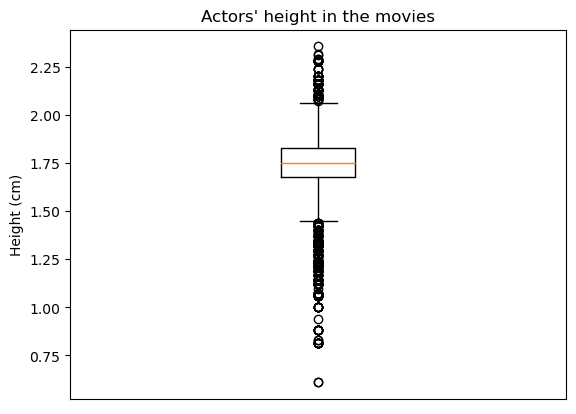

In [19]:
plt.boxplot(characters_gender_height['actor_height'])
plt.xticks([])
plt.title("Actors' height in the movies")
plt.ylabel("Height (cm)")

> We can visualize height by gender. 

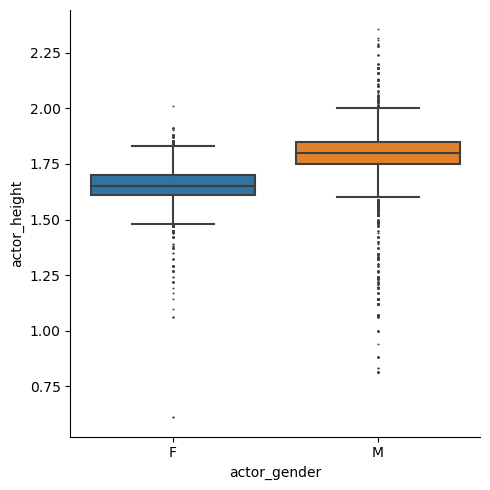

In [20]:
sns.catplot(data=characters_gender_height, x="actor_gender", y="actor_height", kind="box", fliersize=0.5)

> It seems that male characters have more outliers than female characters. 

### Are the observed differences statistically significant? 

> We look at average age and height between male and female characters. 

In [21]:
#In the movies where characters are reported, actresses are on average smaller and younger than men 
characters_gender_grouped = characters_gender.groupby("actor_gender")[["actor_gender", "actor_age_movie", "actor_height"]].mean()
characters_gender_grouped.head()

,actor_age_movie,actor_height
actor_gender,,
F,32.810753,1.659008
M,40.391679,1.863798


> Are these differences statistically significant? \
> To answer this question, we perform an independent sample t-test under the null hypothesis: there is no difference between actors' and actresses'a age. 

In [22]:
# We first extract rows where character is played by a woman or by a man
characters_female_age = characters_gender_age[characters_gender_age['actor_gender']== 'F']
characters_male_age = characters_gender_age[characters_gender_age['actor_gender']== 'M']
print("{:.2%} of characters were gender and age are reported are male.".format(len(characters_male_age)/len(characters_gender_age)))
print("The DataFrame characters_female_age has {} rows, characters_male_age has {} rows.".format(len(characters_female_age), len(characters_male_age)))

65.87% of characters were gender and age are reported are male.
The DataFrame characters_female_age has 99124 rows, characters_male_age has 191277 rows.


In [23]:
#characters_female and characters_male do not have the same shape, we extract 99 242 rows from characters_male to have the same shape to perform an independent t-test
characters_male_age_corr = characters_male_age.sample(n=len(characters_female_age), replace=False)

#We perform the independent sample t-test to compare age of female and male actors
stat_indep_age, pvalue_indep_age = stats.ttest_ind(characters_female_age['actor_age_movie'], characters_male_age_corr['actor_age_movie'])
print("The p-value for the independent sample t-test is: {}".format(pvalue_indep_age))

The p-value for the independent sample t-test is: 0.0


>Here, the p-value is probably below a certain treshold and Pyhton returns 0. \
>As the p-value verifies $ p < 0.05 $, actresses are significantly younger in movies of the dataset than actors, with 95% confidence. 

In [24]:
#We now do the same t-test to compare height of male and female actors
characters_female_height = characters_gender_height[characters_gender_height['actor_gender']== 'F']
characters_male_height = characters_gender_height[characters_gender_height['actor_gender']== 'M']
print("{:.2%} of characters were gender and age are reported are male.".format(len(characters_male_height)/len(characters_gender_height)))
print("The DataFrame characters_female has {} rows, characters_male has {} rows.".format(len(characters_female_height), len(characters_male_height)))

63.46% of characters were gender and age are reported are male.
The DataFrame characters_female has 56515 rows, characters_male has 98133 rows.


In [25]:
#characters_female and characters_male do not have the same shape, we extract 56 515 rows from characters_male to have the same shape to perform an independent t-test
characters_male_corr2 = characters_male_height.sample(n=len(characters_female_height), replace=False)

#We perform the independent sample t-test to compare age of female and male actors
stat_indep_height, pvalue_indep_height = stats.ttest_ind(characters_female_height['actor_height'], characters_male_corr2['actor_height'])
print("The p-value for the independent sample t-test is: {}".format(pvalue_indep_height))

The p-value for the independent sample t-test is: 0.0


>Here again the p-value verifies $ p < 0.05 $ so actresses are significantly smaller in movies of the dataset than actors, with 95% confidence. 

### Is there a correlation between age and gender, or between height and gender? 

> Is gender correlated with age of actors in the movies ? 

In [28]:
#
characters_gender_age_num = pd.get_dummies(data = characters_gender_age[['actor_gender', 'actor_age_movie']])
stats.pearsonr(characters_gender_age_num['actor_gender_F'], characters_gender_age_num['actor_age_movie'])

(-0.2530033181090424, 0.0)

> There is a small (-0.26) but significant ($ p < 0.05 $) negative correlation. 